# Hack Zurich - Fringer

In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.decomposition import PCA

from bokeh.resources import CDN
from bokeh.embed import file_html

from fringiness import *
from bokeh.plotting import show
from data_getter import *

Create random data to test the method.

In [3]:
data = np.vstack((
    random_data(200, 100, mean=.5, sparsity=.8, distribution='poisson'), 
    random_data(200, 100, mean=10, sparsity=.8, distribution='normal'),
    random_data(200, 100, mean=8, sparsity=.8, distribution='poisson'), 
    random_data(200, 100, mean=1, sparsity=.8, distribution='normal')))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


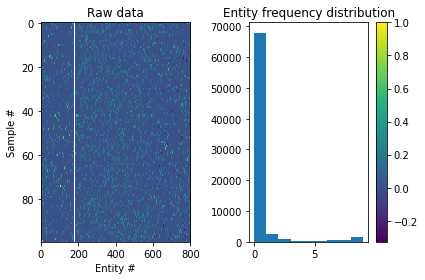

In [4]:
fig = plt.figure()

ax = fig.add_subplot(121)
ax.set_title('Raw data')
cax = ax.imshow(data.T / np.linalg.norm(data,axis=1), aspect='auto')
ax.set_ylabel('Sample #')
ax.set_xlabel('Entity #')

ax = fig.add_subplot(122)
ax.hist(data.flatten(),bins=range(10))
ax.set_title('Entity frequency distribution')

plt.colorbar(cax)
plt.tight_layout()

In [9]:
text = "Hillary Clinton"
res = run(text)
x, y, f = fringiness(res_to_matrix(res))

In [ ]:
data = text_to_matrix(res)
fr = fringiness(data, 'cosine')
plot = embedding_plot_bokeh(x, y, f)
histogram = histogram_bokeh(f)
#show(plot)
#show(histogram)

In [ ]:
html = file_html(plot, CDN, "my plot")
print(html)

In [14]:
[res['point']] + res['environs']

[{'entities': {'Hillary Clinton': 0.8},
  'tags': {'Clinton': 0.5,
   'Clinton presidential campaign': 0.5,
   'Clinton scandal': 0.5,
   'Hilary': 0.5,
   'Hillary Clinton': 1.0,
   'Hillary Clinton presidential campaign': 1.0,
   'Politics': 0.5,
   'United States presidential election': 1.0},
  'topics': {'Hospitality_Recreation': 0.901, 'Politics': 1}},
 {'entities': {'Donald Trump': 0.2,
   'Donald Trump , Jr.': 0.2,
   'Grant McCool': 0,
   'Hillary Clinton': 0.2,
   'JadeRoq LLC': 0.8,
   'Jared\nKushner': 0.2,
   'Jason Maloni': 0.8,
   'Moscow': 0.2,
   'Natalia Veselnitskaya': 0.2,
   'Paul Manafort': 0.8,
   'Robert\nMueller': 0.2,
   'Russia': 0.2,
   'Sarah N. Lynch': 0,
   'Ukraine': 0.2,
   'Viktor Yanukovich': 0.2},
  'tags': {'American people of German descent': 1.0,
   'Business': 0.5,
   'Donald Trump': 0.5,
   'Donald Trump presidential campaign': 1.0,
   'Links between Trump associates and Russian officials': 0.5,
   'Paul Manafort': 0.5,
   'Politics of the United

[{'entities': {'Donald Trump': 0.2,
   'Donald Trump , Jr.': 0.2,
   'Grant McCool': 0,
   'Hillary Clinton': 0.2,
   'JadeRoq LLC': 0.8,
   'Jared\nKushner': 0.2,
   'Jason Maloni': 0.8,
   'Moscow': 0.2,
   'Natalia Veselnitskaya': 0.2,
   'Paul Manafort': 0.8,
   'Robert\nMueller': 0.2,
   'Russia': 0.2,
   'Sarah N. Lynch': 0,
   'Ukraine': 0.2,
   'Viktor Yanukovich': 0.2},
  'tags': {'American people of German descent': 1.0,
   'Business': 0.5,
   'Donald Trump': 0.5,
   'Donald Trump presidential campaign': 1.0,
   'Links between Trump associates and Russian officials': 0.5,
   'Paul Manafort': 0.5,
   'Politics of the United States': 0.5,
   'Russian interference in the 2016 United States elections': 1.0,
   'Special Counsel investigation': 0.5,
   'United States': 0.5},
  'topics': {'Crime': 0.914,
   'Elections / Voting': 0.478,
   'Financial Fraud / Securities Fraud': 0.824,
   'Judicial Process / Court Cases / Court Decisions': 0.204,
   'Law_Crime': 0.867,
   'Politics': 0